In [3]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [16, 12]



In [5]:
# * Параметры модели
T = 1  # Интервал, с
dt = 1e-3  # Шаг, с
C = 0.01  # Ёмкость, Ф
L = 0.01  # Индуктивность, Гн
R = 0.05  # Сопротивление, Ом
E_0 = 10  # Амплитуда ЭДС, В
omega = 20  # Частота свободных колебаний, Гц
omega_0 = 1 / math.sqrt(L * C) # Резонансная частота, Гц
beta = R / (2 * L) 


[&lt;matplotlib.lines.Line2D at 0xd9d4a60&gt;,
 &lt;matplotlib.lines.Line2D at 0xd9d4a78&gt;,
 &lt;matplotlib.lines.Line2D at 0xd9d4ad8&gt;]

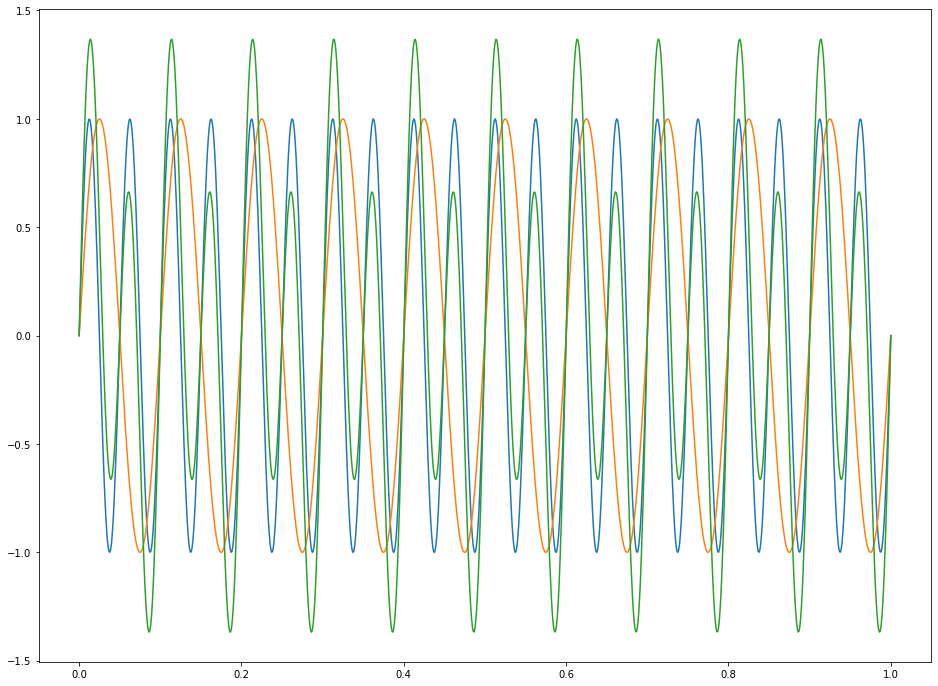

In [7]:
times = np.linspace(0, T, int(T / dt), dtype=np.float32)

sin20 = np.sin(2 * np.pi * 20 * times)
sin10 = np.sin(2 * np.pi * 10 * times)
# sin10 = np.sin(20 * times)
sinx =  sin20 + sin10 * 0.5

plt.plot(times, sin20, times, sin10, times, sinx)

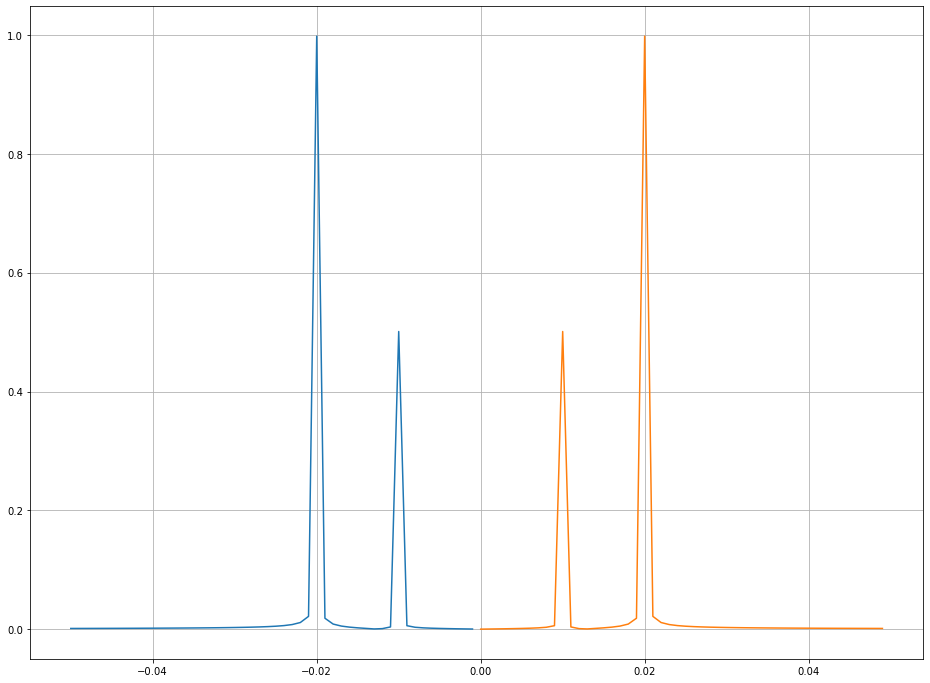

In [11]:
sp20 = np.fft.fft(sin20)
sp10 = np.fft.fft(sin10)
spx = (2 / times.shape[-1]) * np.fft.fft(sinx, len(times))
freq = np.fft.fftfreq(times.shape[-1])
# plt.plot(abs(sp20)[:50])
# plt.plot(abs(sp10)[:50])
plt.plot(freq[-50:], abs(spx)[-50:], freq[:50], abs(spx)[:50])
plt.grid()

In [12]:
times = np.linspace(0, T, int(T / dt), dtype=np.float32)

# * ЭДС
E = E_0 * np.sin(omega * times)

def I_analitic(t):
    """Закон изменения тока после установившихся вынужденных колебаний"""
    pass


def U_C_analitic(t):
    pass

U_C = np.zeros(int(T // dt), dtype=np.float32)
I = np.zeros(int(T // dt), dtype=np.float32)

for i, t in enumerate(t[1:]):
    U_C[i + 1] = U_C[i] + I_L[i] * dt / C
    I[i + 1] = I[i] + (E[i] - U_C[i] - I[i] * R) * dt / L

# * Вывод графиков
fig = plt.figure()
plt.plot(t, I, label="I_C")
plt.plot(t, U_C, label="U_C")
plt.title("Модель RLC-контура с перменным ЭДС")
plt.xlabel("Время")
plt.legend()





(4000000,) (4000000,)


ValueError: x and y must have same first dimension, but have shapes (1,) and (4000000,)

In [ ]:


def I_analitic(t):
    """Закон изменения тока после установившихся вынужденных колебаний"""
    C_1 = E_0 / L / (omega ** 2 - omega_0 ** 2)
    C_2 = C_1 * beta * (1 + 2 * omega)

    return math.exp(-beta * t) * ((C_2 * math.sqrt(omega_0 ** 2 - beta ** 2) - beta * C_1) * math.cos(math.sqrt(omega_0 ** 2 - beta ** 2) * t) - (beta * C_2 + C_1 * math.sqrt(omega_0 ** 2 - beta ** 2)) * math.sin(math.sqrt(omega_0 ** 2 - beta ** 2) * t)) + E_0 / L * (2 * omega ** 2 * beta * \
                    math.cos(omega * t) ** 3 - omega * (omega_0 ** 2 - omega ** 2) * math.cos(omega * t) ** 2 * math.sin(omega * t) - 4 * omega ** 2 * beta * math.cos(omega * t) * math.sin(omega * t) ** 2) / ((omega_0 ** 2 - omega ** 2) * math.cos(omega * t) - 2 * omega * beta * math.sin(omega * t)) ** 2


def U_C_analitic(t):
    pass


U_C = np.zeros(int(t // dt))
I_L = np.zeros(int(t // dt))
I_a = np.zeros(int(t // dt))

U_C[0] = 15

for i, t in enumerate(times[1:]):
    U_C[i + 1] = U_C[i] + I_L[i] * dt / C
    I_L[i + 1] = I_L[i] + (E(t - dt) - U_C[i] - I_L[i] * R) * dt / L
    I_a[i + 1] = I_analitic(t)

I_0_omega = np.zeros(int(2 / math.sqrt(L * C)))

for i, w in enumerate(range(1, int(2 / math.sqrt(L * C)))):
    I_0_omega[i + 1] = E_0 / (math.sqrt(R ** 2 + (w * L - 1 / (w * C)) ** 2))


# * Вывод графиков
fig = plt.figure()
plt.plot(times, I_L, label="I_C")
plt.plot(times, U_C, label="U_C")
plt.title("Модель RLC-контура с перменным ЭДС")
plt.xlabel("Время")
plt.legend()


fig = plt.figure()
plt.plot(times, I_a)
plt.title("Изменение тока при установившихся колебаниях")
plt.xlabel("время")
plt.ylabel("Сила тока")

fig = plt.figure()
plt.plot(list(range(int(2 / math.sqrt(L * C)))), I_0_omega)
plt.title("Зависимость амплитуды тока от частоты колебаний источника ЭДС")
plt.xlabel("Частота колебаний источника ЭДС")
plt.ylabel("Амплитуда тока")
plt.show()

In [ ]:
np.linspace(2.0, 3.0, num=5)
np.linspace(2.0, 3.0, num=5, endpoint=False)
np.linspace(2.0, 3.0, num=5, retstep=True)

N = 8
y = np.zeros(N)
x1 = np.linspace(0, 10, N, endpoint=True)
x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')
plt.plot(x2, y + 0.5, 'o')
plt.ylim([-0.5, 1])
(-0.5, 1)
plt.show()